In [1]:
import seaborn.objects as so
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from dbgsom.dbgsom_ import DBGSOM
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_digits

In [2]:
digits_X, digits_y = load_digits(return_X_y=True)
som = DBGSOM(
    spreading_factor=0.75,
    convergence_iter=10,
    # vertical_growth=True,
    sigma_end=0.8,
    max_iter=200,
    random_state=42,
)

scaler = StandardScaler()

pipe = Pipeline(
    steps=[
        ("scaler", scaler),
        ("som", som),
    ]
)

pipe.fit(digits_X, digits_y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('som',
                 DBGSOM(convergence_iter=10, random_state=42, sigma_end=0.8,
                        spreading_factor=0.75))])

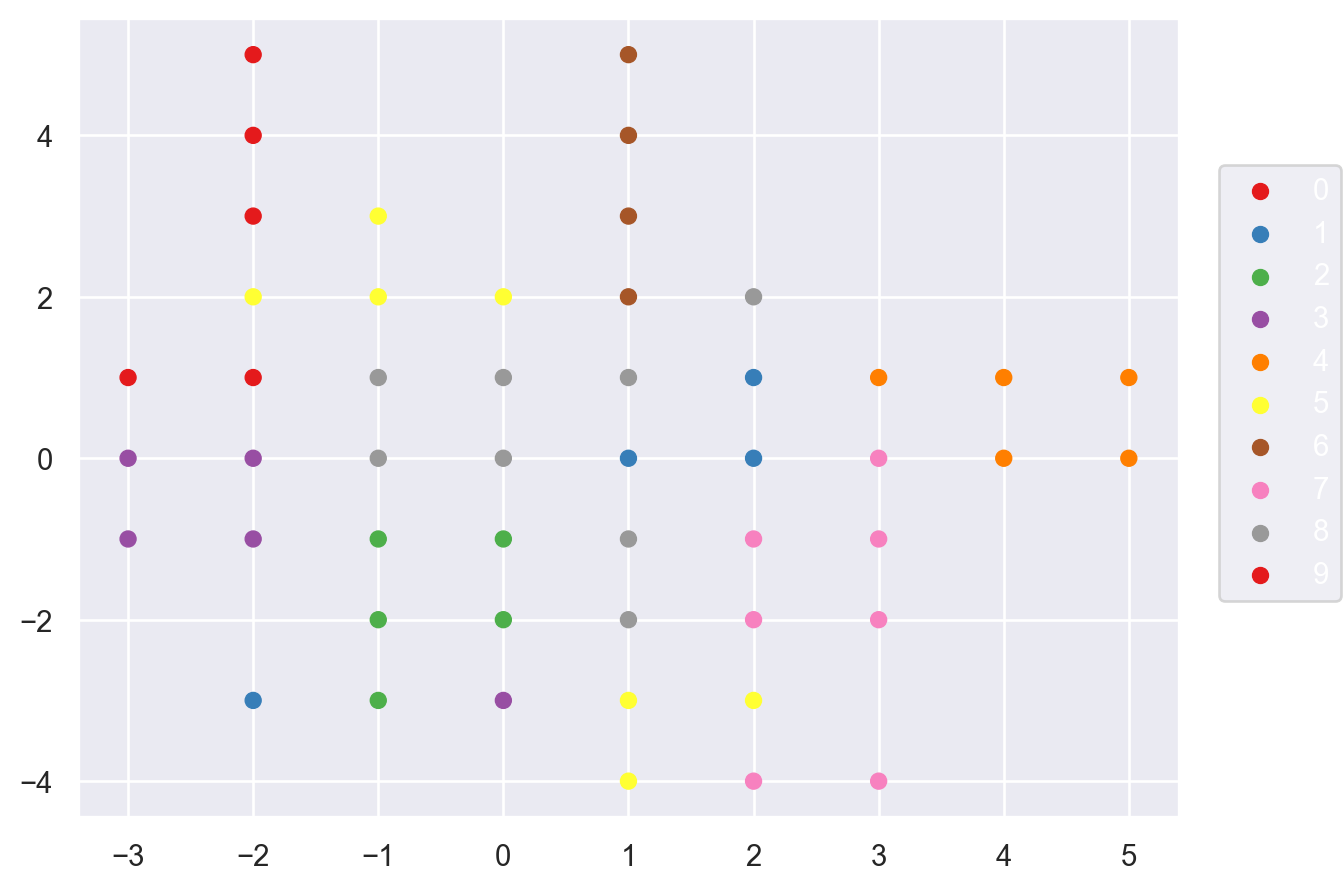

<Figure size 1500x1500 with 0 Axes>

In [3]:
f = plt.figure(figsize=(5, 5), dpi=300)
labels = list(dict(som.som_.nodes.data("label")).values())
coordinates = np.array(som.neurons_)

p = (
    so.Plot(x=coordinates[:, 0], y=coordinates[:, 1], color=labels)
    .add(so.Dot())
    .scale(color="Set1")
)
p.save("digits_classes.png", dpi=300, bbox_inches="tight")

In [4]:
pipe.score(digits_X, digits_y)

0.8792431830829159

In [5]:
# pipe.transform(digits_X)
transform = pipe.transform(digits_X)

<Axes: ylabel='Count'>

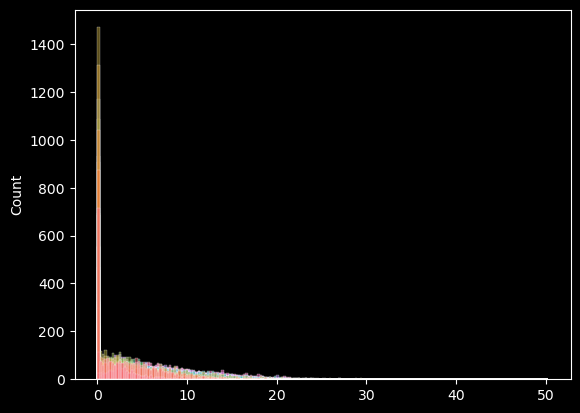

In [6]:
sns.histplot(transform, legend=False)

In [7]:
(transform) @ som._extract_values_from_graph("probabilities")

array([[31.10090991, 26.37833284, 30.09088175, ..., 28.60000287,
        21.85325098, 26.42538031],
       [28.08374592, 26.16831453, 31.81196818, ..., 23.33424416,
        16.65143024, 23.31552953],
       [16.15435254, 15.98730157, 20.61652434, ..., 19.16133639,
        11.56397143, 14.81202284],
       ...,
       [20.97139969, 18.42719151, 27.89146096, ..., 26.82930188,
        18.91653557, 21.53523409],
       [23.58068027, 17.35418286, 23.38911617, ..., 19.63766678,
        18.18564865, 19.10629681],
       [11.64304632, 10.68860034, 15.21879644, ..., 13.48981357,
        10.95704987, 11.03597936]])

In [8]:
transform

array([[ 2.53943308,  6.17431947,  6.31823392, ...,  9.3430896 ,
         0.        ,  9.121005  ],
       [ 1.17967326,  4.78507344,  9.04718749, ...,  9.28274255,
         0.        , 11.1154731 ],
       [ 0.        ,  4.02913299,  8.82862411, ...,  6.02607627,
         2.13880738,  5.44086507],
       ...,
       [ 5.31348103,  3.84596715,  6.3611831 , ...,  8.27982095,
         5.38278918,  7.72892164],
       [ 3.03320461,  5.26369642,  0.        , ...,  6.51630947,
         1.06466509,  8.71079384],
       [ 0.42130522,  3.06685382,  3.63723858, ...,  5.1010027 ,
         1.13180529,  5.62547591]])